# Package ที่ใข้

In [19]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [20]:
ตรี_all = pd.read_csv("ตรี_All.csv")
data_2563 = pd.read_csv("2563.csv")
data_2564 = pd.read_csv("2564.csv")
data_2565 = pd.read_csv("2565.csv")
data_2566 = pd.read_csv("2566.csv")

list_data = [data_2563, data_2564, data_2565, data_2566, ตรี_all]

In [21]:
for c in list_data:
    for i in range(len(c.สาขาวิชา)):
        c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("-", " ")
        c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("(", " ")
        c.สาขาวิชา[i] = c.สาขาวิชา[i].replace(")", " ")
        c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("[", " ")
        c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("]", " ")

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1939828667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("-", " ")
C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1939828667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.สาขาวิชา[i] = c.สาขาวิชา[i].replace("(", " ")
C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1939828667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.สาขาวิชา

In [22]:
for c in list_data:
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์ / เทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ทุกสาขา'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการตลาด'), 'สาขาวิชา'] = 'การตลาด' 
    c.loc[c['สาขาวิชา'].str.contains('สาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมโยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ทางวิศวกรรมไฟฟ้ากำลัง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบัญชี, บัญชีการเงิน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาการคอมพิวเตอร์และเทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ไม่กำหนด'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเภสัชศาสตร์'), 'สาขาวิชา'] = 'เภสัชศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัด'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมเครื่องกล'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมโยธา/ก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดสาขา'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('บัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'

    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีการศึกษาปฐมวัย'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดสาขา แต่มีประสบการณ์ในงานงาน'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการขาย'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('สาขาคอมพิวเตอร์, วิทยาการคอมพิวเตอร์, วิศวกรรมคอมพิวเตอร์ หรือ สาขาอื่นที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์'), 'สาขาวิชา'] = 'วิทยาศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอาชีวอนามัยและความปลอดภัย'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการพัฒนาทรัพยากรมนุษย์'), 'สาขาวิชา'] = 'การพัฒนาทรัพยากรมนุษย์'
    c.loc[c['สาขาวิชา'].str.contains('การขายการตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีกายภาพบำบัด'), 'สาขาวิชา'] = 'กายภาพบำบัด'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรม'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('สาขาวิศวกรรมคอมพิวเตอร์หรือเทคโนโลยีสารสนเทศหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการทั่วไป'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ วิชาเอกบริหารธุรกิจ การตลาด'), 'สาขาวิชา'] = 'การตลาด' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์ธุรกิจ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'

    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีการศึกษา  EDUCATION '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีพยาบาลศาสตร์'), 'สาขาวิชา'] = 'พยาบาลศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการ การบริหารทั่วไป'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมอุตสาหการ, วิศวกรรมโรงงานอุตสาหกรรม'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์ เกษตร'), 'สาขาวิชา'] = 'การเกษตร' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีศิลปกรรมและสถาปัตยกรรม'), 'สาขาวิชา'] = 'สถาปัตยกรรม'
    c.loc[c['สาขาวิชา'].str.contains('วิศวโยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('สาขาวิศวกรรมไฟฟ้าหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การขาย/การตลาด'), 'สาขาวิชา'] = 'การตลาด'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสถาปัตยกรรมศาสตร์'), 'สาขาวิชา'] = 'สถาปัตย์'
    c.loc[c['สาขาวิชา'].str.contains('การขายหรือการตลาด และต้องมีประสบการณ์ในสายงาน อย่างน้อย 1 2 ปี'), 'สาขาวิชา'] = 'การตลาด' 
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (คณิตศาสตร์)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีครุศาสตร์ , ศึกษาศาสตร์'), 'สาขาวิชา'] = 'ครุศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์ เคมี'), 'สาขาวิชา'] = 'วิทยาศาสตร์' 
    c.loc[c['สาขาวิชา'].str.contains('การขายและการตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาญี่ปุ่น'), 'สาขาวิชา'] = 'ภาษาญี่ปุ่น'
    c.loc[c['สาขาวิชา'].str.contains('บริหารธุรกิจหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'บริหารธุรกิจ'

    c.loc[c['สาขาวิชา'].str.contains('วิศวอุตสาหการ/วิศวะ'), 'สาขาวิชา'] = 'วิศวอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสัตวแพทย์'), 'สาขาวิชา'] = 'สัตวแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสตร์และวิศวกรรมศาสตร์'), 'สาขาวิชา'] = 'วิศวกรรมศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดสาขา /  ยินดีรับเด็กจบใหม่'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('Engineering'), 'สาขาวิชา'] = 'วิศวกรรม'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมเคมี'), 'สาขาวิชา'] = 'วิศวกรรมเคมี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการโรงแรมและการท่องเที่ยว / อุตสาหกรรม / ประกันภัย'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมศาสตร์และช่างต่าง ๆ'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอุตสาหกรรม'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารและการจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรี วิศวเครื่องกล'), 'สาขาวิชา'] = 'วิศวเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการตลาดทั่วไป'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดสาขา แต่มีประสบการณ์ในงานงาน อย่างน้อย 2 ปี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเศรษฐศาสตร์'), 'สาขาวิชา'] = 'เศรษฐศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ความปลอดภัย อาชีวอนามัยหรือสาขาอื่นๆ ที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการโรงแรม'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  บริการสื่อการศึกษา '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัด แต่ต้องมีประสบการณ์ในสายงาน อย่างน้อย 3 5 ปี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา' 
    c.loc[c['สาขาวิชา'].str.contains('คอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (บริการสื่อการศึกษา)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีการประถมศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้าและระบบ'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีพยาบาลศึกษา'), 'สาขาวิชา'] = 'พยาบาลศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสังคมสิ่งแวดล้อม'), 'สาขาวิชา'] = 'สังคมสิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('การตลาดหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'

    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรม / ช่างไฟฟ้า / งานระบบอาคาร'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมเครื่องมือวัด'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('Mechanical Engineer or any related filed.'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคนิคการแพทย์'), 'สาขาวิชา'] = 'เทคนิคการแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีหมวดธุรกิจการเกษตร'), 'สาขาวิชา'] = 'การเกษตร'

    c.loc[c['สาขาวิชา'].str.contains('กราฟฟิกส์ดีไซด์'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการผลิต'), 'สาขาวิชา'] = 'เทคโนโลยีการผลิต'
    c.loc[c['สาขาวิชา'].str.contains('การตลาด การขาย'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้า (เทคโนโลยีไฟฟ้าอุตสาหกรรม)'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการออกแบบนิเทศศิลป'), 'สาขาวิชา'] = 'การออกแบบ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีศาสตร์คอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิจัยและพัฒนาหลักสูตร'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารทรัพยากรมนุษย์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนอุตสาหกรรมศิลป์(ออกแบบ เขียนแบบ)'), 'สาขาวิชา'] = 'ครุศาสตร์' 
    c.loc[c['สาขาวิชา'].str.contains('การดูแลเด็กและผู้สูงอายุ'), 'สาขาวิชา'] = 'พยาบาลศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสื่อสารและการจัดการธุรกิจ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์การอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ การตลาด'), 'สาขาวิชา'] = 'การตลาด' 
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมศาสตร์'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีครุศาสตร์ ปฐมวัย'), 'สาขาวิชา'] = 'ครุศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('เครื่องกล,อุตสาหการ'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('คหกรรมศาสตร์'), 'สาขาวิชา'] = 'คหกรรมศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีออกแบบ   เขียนแบบ'), 'สาขาวิชา'] = 'การออกแบบ' 
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดวุฒิ'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('บริหาร'), 'สาขาวิชา'] = 'บริหารธุรกิจ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคณิตศาสตร์ศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเครื่องกล'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (ภาษาอังกฤษ)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (อุตสาหกรรมศิลป์ออกแบบ   เขียนแบบ)'), 'สาขาวิชา'] = 'การออกแบบ' 

    c.loc[c['สาขาวิชา'].str.contains('สาขา วิทยาศาสตร์การอาหารหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมเคมีและเทคนิควัสดุ / สิ่งทอ'), 'สาขาวิชา'] = 'วิศวกรรมเคมี'
    c.loc[c['สาขาวิชา'].str.contains('Mechanical Engineer any field.'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('สัตวบาล / สัตวศาสตร์'), 'สาขาวิชา'] = 'สัตวแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('Rubber Technology'), 'สาขาวิชา'] = 'วิศวกรรม'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบัญชีต้นทุน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('IT'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (ภาษาอังกฤษชั้นสูง)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการทรัพยากรบุคคล'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('เกษตร'), 'สาขาวิชา'] = 'การเกษตร'

    c.loc[c['สาขาวิชา'].str.contains('Electrical Engineer'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสตร์บัณฑิต'), 'สาขาวิชา'] = 'วิทยาศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สาขาบัญชี หรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมสิ่งแวดล้อม'), 'สาขาวิชา'] = 'วิศวกรรมสิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (วิทยาศาสตร์ทั่วไป)'), 'สาขาวิชา'] = 'ครุศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมโลจิสติกส์'), 'สาขาวิชา'] = 'วิศวกรรมโลจิสติกส์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมอิเลกทรอนิกส์'), 'สาขาวิชา'] = 'วิศวกรรมอิเลกทรอนิกส์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการโรงแรมและการท่องเที่ยว'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'
    c.loc[c['สาขาวิชา'].str.contains('สาธารณสุข'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการเงิน'), 'สาขาวิชา'] = 'การเงิน'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคณิตศาสตร์ / สถิติ'), 'สาขาวิชา'] = 'คณิตศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีมัธยมศึกษา วิชาเอกคอมพิวเตอร์การศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมก่อสร้าง'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีการเกษตร วิชาเอกเทคโนโลยีพืชสวน'), 'สาขาวิชา'] = 'การเกษตร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมอุตสาหการ'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการท่องเที่ยวและการโรงแรม'), 'สาขาวิชา'] = 'การท่องเที่ยวและการโรงแรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ แขนงวิชาการตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเครื่องกล(วิชาเอกเทคนิคช่างยนต์)'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการงานคอมพิวเตอร์และวิศวกรรม'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('Logistic or any related field'), 'สาขาวิชา'] = 'วิศวกรรมโลจิสติกส์'
    c.loc[c['สาขาวิชา'].str.contains('ภูมิทัศน์สถาปัตย์พืชสวน'), 'สาขาวิชา'] = 'สถาปัตย์'
    c.loc[c['สาขาวิชา'].str.contains(',สัตวแพทย์'), 'สาขาวิชา'] = 'สัตวแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีไฟฟ้าอิเลคทรอนิคส์'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีช่างกลโรงงาน'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหาร'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีการจัดการ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารทั่วไป'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์สิ่งแวดล้อม / วิทยาศาสตร์การอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์และเทคโนโลยี การอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเศรษฐศาสตร์การเงินและการคลัง'), 'สาขาวิชา'] = 'การเงิน'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมศาตร์ สาขาเครื่องกลหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการโรงแรม'), 'สาขาวิชา'] = 'การท่องเที่ยวและการโรงแรม'
    c.loc[c['สาขาวิชา'].str.contains('สาขาใดก็ได้'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสาธาณะสุข'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีสิ่งแวดล้อม สาขาวิชาเฉพาะวิศวกรรมอนามัยสิ่งแวดล้อม'), 'สาขาวิชา'] = 'วิศวกรรมสิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีนิติศาสตร์'), 'สาขาวิชา'] = 'นิติศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเศรษฐศาสตร์การเงินและการตลาด'), 'สาขาวิชา'] = 'การเงิน'
    c.loc[c['สาขาวิชา'].str.contains('วิศวะ'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีศิลปการพิมพ์'), 'สาขาวิชา'] = 'การพิมพ์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ แขนงวิชาการบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('การบริหาร'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาอังกฤษ (การสอน)'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('การบริการ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  วิทยาศาสตร์ คณิตศาสตร์ '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมไฟฟ้าอิเล็คทรอนิกส์ และสาขาอื่นๆที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('วิชาการบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมเขียนแบบและออกแบบการผลิต'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์และเทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('บริหาร และ อื่นๆ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('เขียนแบบ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('นิเทศศาสตร์ / สื่อสารมวลชนและการเอกสาร'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมคอมพิวเตอร์และระบบอัติโนมัติ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมไฟฟ้า'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (วิทยาศาสตร์ คณิตศาสตร์)'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ' 
    c.loc[c['สาขาวิชา'].str.contains('บริหารจัดการ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีและสื่อสารการศึกษา'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('Information and Technology หรือที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการทั่วไป และสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('Electrical Engineering or related field'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการออกแบบผลิตภัณฑ์'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการตลาดระหว่างประเทศ'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('วิศววกรรมเคมี'), 'สาขาวิชา'] = 'วิศวกรรมเคมี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีกฏหมายทั่วไป'), 'สาขาวิชา'] = 'นิติศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('การตลาด/บริหารคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('อุตสาหการ'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('กราฟฟิคดีไซน์ หรือโซเซียลมีเดีย'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมการโยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาการจัดการอุตสาหกรรม'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารการตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีช่างยนต์'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจระหว่าง ประเทศ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ แขนงวิชาการเลขานุการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมอุตสาหการ (เชื่อมประสาน)'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('Electrical Engineering'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ช่างไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีมนุษยศาสตร์ , มานุษยวิทยา'), 'สาขาวิชา'] = 'มนุษยศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('อาชีวอนามัยและความปลอดภัย'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('food,วิทยาศาสตร์,สัตวแพทย์'), 'สาขาวิชา'] = 'สัตวแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('ก่อสร้าง/วิศวกรรมศาตร์'), 'สาขาวิชา'] = 'วิศวกรรมก่อสร้าง'
    c.loc[c['สาขาวิชา'].str.contains('คอมพิวเตอร์ธุรกิจ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรีเทคโนโลยีอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ปวส. ช่างเครื่องกล'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('การตลาด/เทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัดสาขา แต่มีประสบการณ์ในงานงาน อย่างน้อย 3 5 ปี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('วิสวกรรม'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการออกแบบผลิตภัณฑ์, ศิลปะอุตสาหกรรม'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('บริหารการจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('บัญชี/ตรวจสอบภายใน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัด แต่ต้องมีประสบการณ์ในสายงาน อย่างน้อย 5 7 ปี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains('การก่อสร้าง/โยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (ภาษาไทย)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการออกแบบสถาปัตยกรรม'), 'สาขาวิชา'] = 'สถาปัตยกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนอุตสาหกรรมศิลป์ (ช่างยนต์)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิศวโยธาและการจัดการ'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ภาษาอังกฤษ'), 'สาขาวิชา'] = 'ภาษาอังกฤษ'
    c.loc[c['สาขาวิชา'].str.contains('คอมพิวเตอร์ การตลาด ภาษาอังกฤษ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (พลศึกษา)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนวิชาชีววิทยาระดับมัธยมศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('นิติศาสตร์'), 'สาขาวิชา'] = 'นิติศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สาขา วิทยาศาสตร์การอาหารหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการวิจัยและการพัฒนาหลักสูตร'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีการบรรจุ'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีและนวัตกรรมทาง การศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสตร์คอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสตร์สาขาเคมี/ชีววิทยา'), 'สาขาวิชา'] = 'วิศวกรรมเคมี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการศึกษานอกระบบ คหกรรมศาสตร์'), 'สาขาวิชา'] = 'ครุศาสตร์' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์ศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนธุรกิจศิลป์ (บริหารธุรกิจ)'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนคหกรรมศาสตร์'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('บริหารธุรกิจ / บัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรีสาขาบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาต่างประเทศ'), 'สาขาวิชา'] = 'อักษรศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรี เทคโนโลยีอาหาร'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('Electrical, Chemical, Mechanical. Energy Engineering'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('การสอน'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สาขาไฟฟ้าหรือสาขาอื่นที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีออกแบบภายใน'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ปฐมวัย และสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('โพลิเมอร์'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาอังกฤษธุรกิจ'), 'สาขาวิชา'] = 'ภาษาอังกฤษ'
    c.loc[c['สาขาวิชา'].str.contains('ภาษาญี่ปุ่น หรือเกี่ยวข้อง'), 'สาขาวิชา'] = 'ภาษาญี่ปุ่น'
    c.loc[c['สาขาวิชา'].str.contains('ช่างไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอาชีวอนามัยหรือเทียบเท่า'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('Business Administration, Marketing or related filed'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (การสอนเด็กพิเศษ)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการศึกษาคณิตศาสตร์'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารการศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนภาษาไทย'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรรมยานยนต์'), 'สาขาวิชา'] = 'วิศวกรรรมยานยนต์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีประมง'), 'สาขาวิชา'] = 'การประมง'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารอุตสาหการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('บริหาร, การตลาด , มนุษยศาสร์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเคมีเทคนิค'), 'สาขาวิชา'] = 'วิศวกรรมเคมี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีจิตวิทยาอุตสาหกรรม'), 'สาขาวิชา'] = 'จิตวิทยา'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรีวิทยาศาสตร์เคมี'), 'สาขาวิชา'] = 'วิทยาศาสตร์เคมี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสื่อสารมวลชน'), 'สาขาวิชา'] = 'สื่อสารมวลชน'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอิเล็กทรอนิกส์'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('การก่อสร้าง/สถาปัตย์'), 'สาขาวิชา'] = 'สถาปัตย์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเกษตรกรรม'), 'สาขาวิชา'] = 'การเกษตร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีมานุษยสงเคราะห์'), 'สาขาวิชา'] = 'มนุษย์สงเคราะห์ศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิศว'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('สิ่งแวดล้อม อาชีวอนามัย หรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์สิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการออกแบบสถาปัตยกรรม หรือที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'สถาปัตยกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ แขนงวิชาการบริหารงานอุตสาหกรรม'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรี สาขาบริหารทรัพยากรมนุษย์ หรือที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('การเงิน การบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีหมวดการเงิน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสอนภาษาจีน'), 'สาขาวิชา'] = 'ภาษาจีน'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรีสาขาเทคโนโลยีการอาหาร  หรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ การบัญชี'), 'สาขาวิชา'] = 'บริหารธุรกิจ' 
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีการตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีบัญชี/การเงิน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีรัฐศาสตร์ / การบริหาร'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('Industrial Engineer'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอาชีวศึกษา/อุดมศึกษา'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('บริหารธุรกิจ หรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('บริการการจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('การจัดการโลจิสติกส์'), 'สาขาวิชา'] = 'โลจิสติกส์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการประกันภัย'), 'สาขาวิชา'] = 'คณิตศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีกฎหมาย'), 'สาขาวิชา'] = 'นิติศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('บริหารทรัพยากรบุคคล'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเภสัชกรรม'), 'สาขาวิชา'] = 'เภสัชศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมสำรวจ'), 'สาขาวิชา'] = 'วิศวกรรมสำรวจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ แขนงวิชาการบริหารงานทั่วไป'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสังคมศาสตร์การแพทย์และสาธารณสุข'), 'สาขาวิชา'] = 'สังคมศาสตร์การแพทย์และสาธารณสุข'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาการคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรี สาขา บริหารหรือที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('บริหารและการจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรี ความปลอดภัย'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีอาชีวอนามัย'), 'สาขาวิชา'] = 'อาชีวอนามัย'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีศิลปการช่าง'), 'สาขาวิชา'] = 'ศิลปการช่าง'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์การแพทย์'), 'สาขาวิชา'] = 'วิทยาศาสตร์การแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเศรษฐศาสตร์การขนส่ง'), 'สาขาวิชา'] = 'โลจิสติกส์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์ ฟิสิกส์'), 'สาขาวิชา'] = 'วิทยาศาสตร์ฟิสิกส์' 
    c.loc[c['สาขาวิชา'].str.contains('อุตสาหกรรมยานยนต์'), 'สาขาวิชา'] = 'วิศกรรมยานยนต์'
    c.loc[c['สาขาวิชา'].str.contains('การเงินและบัญชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบัญชีต้นทุน'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('บริหารธุรกิจ / การตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('สถาปัตยกรรม / มัณฑนศิลป์ / ผังเมือง'), 'สาขาวิชา'] = 'สถาปัตยกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมความปลอดภัย'), 'สาขาวิชา'] = 'วิศวกรรมความปลอดภัย'
    c.loc[c['สาขาวิชา'].str.contains('การบันชี'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('วิศวะโยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการเงินและการธนาคาร'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการเลขานุการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคนิคเขียนแบบวิศวกรรมเครื่องกล'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีการอาหารและโภชนาการ'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรสิ่งแวดล้อม'), 'สาขาวิชา'] = 'วิศวกรรมสิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('ปฐมวัย'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สาขาการด้านธุรกิจหรือด้านนิติศาสตร์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  คณิตศาสตร์ '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ออกแบบดีไซน์'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเทคโนโลยีการผลิต'), 'สาขาวิชา'] = 'วิทยาศาสตร์การผลิต'
    c.loc[c['สาขาวิชา'].str.contains('Electrical , Mechatronics, Computer Engineer'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('เทคนิคแม่พิมพื'), 'สาขาวิชา'] = 'จิตรกรรมประติมากรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษา วิชาเอกภาษาอังกฤษ'), 'สาขาวิชา'] = 'ภาษาอังกฤษ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมสิ่งทอ'), 'สาขาวิชา'] = 'วิศวกรรมสิ่งทอ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมการผลิต,เคมี,อุตสาหกรรม'), 'สาขาวิชา'] = 'วิศวกรรมเคมีอุตสาหกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการสื่อสาร'), 'สาขาวิชา'] = 'นิเทศศาสตร์ด้านการสื่อสาร'
    c.loc[c['สาขาวิชา'].str.contains('สาขาวิชาเอกคณิตศาสตร์'), 'สาขาวิชา'] = 'วิทยาศาสตร์คณิตศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีดุริยางคศาสตร์, ดนตรี'), 'สาขาวิชา'] = 'ดุริยางคศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (คณิตศาสตร์)'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสรต์ประยุกต์/พลังงาน/เคมี/สิ่งแวดล้อม'), 'สาขาวิชา'] = 'วิทยาศาสตร์เคมี'
    c.loc[c['สาขาวิชา'].str.contains('ปริญญาตรี(วทบ.)สาขาวิทยาศาสตร์และเทคโนโลยีการอาหาร  หรือสาขาอื่นๆ  ที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('สาขาเทคโนโลยีการอาหาร  หรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'

    c.loc[c['สาขาวิชา'].str.contains('Mechatronics or Engineer any field.'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารธุรกิจ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมคอมฯ สาขาวิทยาการคอมฯ  มีประสบการณ์ในสายงาน 1 2 ปี'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์ / เทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิจัย'), 'สาขาวิชา'] = 'วิทยาศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีรังสีเทคนิค'), 'สาขาวิชา'] = 'วิทยาศาสตร์รังสีเทคนิค'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเศรษฐศาสตร์เกษตร'), 'สาขาวิชา'] = 'เศรษฐศาสตร์เกษตร'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาไทย การศึกษานอกระบบ'), 'สาขาวิชา'] = 'ครุศาสตร์' 
    c.loc[c['สาขาวิชา'].str.contains('ตรีพื้นฐานการศึกษา'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('นิติศาสตร์\u200b'), 'สาขาวิชา'] = 'นิติศาสตร์'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีช่างเชื่อมโลหะ'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเภสัชกรรมโรงพยาบาล'), 'สาขาวิชา'] = 'g'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีหมวดบัญชีการเงิน'), 'สาขาวิชา'] = 'การเงินและบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('Business Administration หรือที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('วิศวกรรมคอมพิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'

    c.loc[c['สาขาวิชา'].str.contains('ช่างเทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีเคมีอุตสาหการ ปิโตรเคมี'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบัญชีธุรกิจการโรงแรม'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'
    c.loc[c['สาขาวิชา'].str.contains('นิเทศศาสตร์'), 'สาขาวิชา'] = 'นิเทศศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สาขาท่องเที่ยว'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'

    c.loc[c['สาขาวิชา'].str.contains('การตลาด/ขาย'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('วิทยาศาสตร์การกีฬา'), 'สาขาวิชา'] = 'วิทยาศาสตร์การกีฬา'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  สังคมศึกษา '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ วิชาเอกบริหารธุรกิจ การบัญชี'), 'สาขาวิชา'] = 'บริหารธุรกิจ'  
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีวิศกรรมไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'

    c.loc[c['สาขาวิชา'].str.contains('สาร์นสนเทศน์/เทคโนโลี'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  ชีววิทยา '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('การจัดการ การตลาด'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีทันตแพทยศาสตร์'), 'สาขาวิชา'] = 'ทันตแพทยศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการจัดการงานก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมก่อสร้าง'

    c.loc[c['สาขาวิชา'].str.contains('วิทยาการคอมพิวเตอร์ และ วิศวกรรม(คอมพิวเตอร์)'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการประชาสัมพันธ์'), 'สาขาวิชา'] = 'การประชาสัมพันธ์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีวิศวกร'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิทยาศาสตร์สิ่งแวดล้อม'), 'สาขาวิชา'] = 'วิทยาศาสตร์สิ่งแวดล้อม'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีการบริหารทรัพยากรมนุษย์และองค์การ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมอุตสาหการ (วิศวกรรมเคมีอุตสาหกรรม)'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีคอมพิวเตอร์ / เทคโนโลยีสารสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ฝ่ายผลิต'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('Industrial Engineer or related fields'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรี วิศวกรรมไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  วิทยาศาสตร์กายภาพ ชีวภาพ '), 'สาขาวิชา'] = 'วิทยาศาสตร์' 
    c.loc[c['สาขาวิชา'].str.contains('data science'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('design'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('Finance, Economics, Business Administration'), 'สาขาวิชา'] = 'บริหารธุรกิจ'

    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้า / อิเล็กทรอนิกส์ / คอมพิวเตอร์'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('Computer Science, IT or Software Engineer'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีบริหารธุรกิจ / พณิชยศาสตร์ /บัญชี'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรม'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('การตลาด คอมพิวเตอร์ โลจิสติกส์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'

    c.loc[c['สาขาวิชา'].str.contains('โลจิสติกส์ การตลาด คอมพิวเตอร์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ไฟฟ้าหรือบริหารธุรกิจหรือสาขาที่เกี่ยวข้อง'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ไม่จำกัด แต่ต้องมีประสบการณ์ในสายงาน อย่างน้อย 7 10 ปี'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา' 
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิจัย'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('การตลาด คอมพิวเตอร์ โลจิสติกส์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ไฟ้ฟ้า ,เครื่องกล,ช่างยนต์'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('Electrical or any related field'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การขายหรือการตลาด และต้องมีประสบการณ์ในสายงาน อย่างน้อย 1-2 ปี'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains(' อุตสาหกรรม  เทคโนโลยการผลิต เครื่องกล'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('การออกแบบ/กราฟิกดีไซต์'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('ช่างกลโรงงาน ช่างกลึง'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('Qualifications in Business (Accounting) or Commerce'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีภาษาไทย-การศึกษานอกระบบ'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('Programmer'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  ชีววิทยา '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  คณิตศาสตร์ '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา  วิทยาศาสตร์ คณิตศาสตร์  '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ขั้นต่ำป.ตรีงานบุคคล'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('การจัดการทั่วไป'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('ไม่เน้น'), 'สาขาวิชา'] = 'ไม่จำกัดสาขา'
    c.loc[c['สาขาวิชา'].str.contains(' อุตสาหกรรม เทคโนโลยีการผลิต เครื่องกล'), 'สาขาวิชา'] = 'วิศวกรรม'
    c.loc[c['สาขาวิชา'].str.contains('ป. ตรีการศึกษา  EDUCATION '), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('yP=u'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('Electrical, Power Electrical'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ช่างการจัดการอุตสาหกรรม, ช่างปั้นแบบ'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('การโรงแรม'), 'สาขาวิชา'] = 'การโรงแรมและการท่องเที่ยว'
    c.loc[c['สาขาวิชา'].str.contains('ภาษาญี่ปุ่น'), 'สาขาวิชา'] = 'ญี่ปุ่น'
    c.loc[c['สาขาวิชา'].str.contains('ทางไฟฟ้ากำลัง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ก่อสร้าง'), 'สาขาวิชา'] = 'วิศวกรรมก่อสร้าง'
    c.loc[c['สาขาวิชา'].str.contains('ไฟฟ้า'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การจัดการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('เชื่อมโลหะ'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ยานยนต์'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องกล'
    c.loc[c['สาขาวิชา'].str.contains('สาขาวิชาเทคนิคอุตสาหกรรม'), 'สาขาวิชา'] = 'วิศวกรรมอุตสาหการ'
    c.loc[c['สาขาวิชา'].str.contains('คณิตศาสตร์'), 'สาขาวิชา'] = 'ครุศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ไฟฟา'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('อิเล็กทรอนิค'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ภาษาอังกฤษ'), 'สาขาวิชา'] = 'อังกฤษ'
    c.loc[c['สาขาวิชา'].str.contains('Qualifications in Business  Accounting  or Commerce'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('พาณิชยการ'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('เลขานุการ'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การประชาสัมพันธ์'), 'สาขาวิชา'] = 'นิเทศศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('อีเล็คทรอนิก'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('ไฟฟ้ากำลัง'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('การขาย'), 'สาขาวิชา'] = 'การตลาด'
    c.loc[c['สาขาวิชา'].str.contains('แม่พิมพ์โลหะ'), 'สาขาวิชา'] = 'จิตกรรมประติมากรรม'
    c.loc[c['สาขาวิชา'].str.contains('สื่อสารมวลชน'), 'สาขาวิชา'] = 'นิเทศศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('การพัฒนาทรัพยากรมนุษย์'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('คอมฟิวเตอร์'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('สถาปัตยกรรมศาสตร์'), 'สาขาวิชา'] = 'สถาปัตย์'
    c.loc[c['สาขาวิชา'].str.contains('ธุรการ'), 'สาขาวิชา'] = 'บริหารธุรกิจ'
    c.loc[c['สาขาวิชา'].str.contains('อีเล็คทรอนิกส์'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('อิเล็คทรอนิกส์'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('เทคโนโลยีการผลิต'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
    c.loc[c['สาขาวิชา'].str.contains('พาณิชยาการ'), 'สาขาวิชา'] = 'การบัญชี'
    c.loc[c['สาขาวิชา'].str.contains('Laws'), 'สาขาวิชา'] = 'นิติศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('สังคมสิ่งแวดล้อม'), 'สาขาวิชา'] = 'สังคมสิ่งแวดล้อม'
    c.loc[c['สาขาวิชา'].str.contains('การโยธา'), 'สาขาวิชา'] = 'วิศวกรรมโยธา'
    c.loc[c['สาขาวิชา'].str.contains('ความคุมเครื่องจักร'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องยนต์'
    c.loc[c['สาขาวิชา'].str.contains('การพิมพ์'), 'สาขาวิชา'] = 'จิตรกรรมประติมากรรม'
    c.loc[c['สาขาวิชา'].str.contains('เทคนิคสาระสนเทศ'), 'สาขาวิชา'] = 'เทคโนโลยีสารสนเทศ'
    c.loc[c['สาขาวิชา'].str.contains('การประมง'), 'สาขาวิชา'] = 'การประมง'
    c.loc[c['สาขาวิชา'].str.contains('ป.ตรีสัตวแพทยศาสตร์'), 'สาขาวิชา'] = 'สัตวแพทย์'
    c.loc[c['สาขาวิชา'].str.contains('เฉพาะทางด้านไตเทียม'), 'สาขาวิชา'] = 'แพทยศาสตร์'
    c.loc[c['สาขาวิชา'].str.contains('ออกแบบ'), 'สาขาวิชา'] = 'การออกแบบ'
    c.loc[c['สาขาวิชา'].str.contains('เกษคร'), 'สาขาวิชา'] = 'การเกษตร'
    c.loc[c['สาขาวิชา'].str.contains('อาหารและโภชนาการ'), 'สาขาวิชา'] = 'วิทยาศาสตร์การอาหาร'
    c.loc[c['สาขาวิชา'].str.contains('ช่่างยนต์'), 'สาขาวิชา'] = 'วิศวกรรมเครื่องยนต์'
    c.loc[c['สาขาวิชา'].str.contains('อาชีวอนามัย'), 'สาขาวิชา'] = 'อาชีวอนามัยและความปลอดภัย'

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\3530519396.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c.loc[c['สาขาวิชา'].str.contains('ป. ตรีประถมศึกษา (คณิตศาสตร์)'), 'สาขาวิชา'] = 'ครุศาสตร์'
C:\Users\USER\AppData\Local\Temp\ipykernel_1912\3530519396.py:90: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c.loc[c['สาขาวิชา'].str.contains('ป. ตรีมัธยมศึกษา (บริการสื่อการศึกษา)'), 'สาขาวิชา'] = 'ครุศาสตร์'
C:\Users\USER\AppData\Local\Temp\ipykernel_1912\3530519396.py:108: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c.loc[c['สาขาวิชา'].str.contains('ป.ตรีวิศวกรรมไฟฟ้า (เทคโนโลยีไฟฟ้าอุตสาหกรรม)'), 'สาขาวิชา'] = 'วิศวกรรมไฟฟ้า'
C:\Users\USER\AppData\Local\Temp\ipykernel_1912\3530519396.py:114: UserWarning: This patt

In [23]:
for c in list_data:
    for i in range(len(c.สาขาวิชา)):
        match1 = re.search("ปวส", c.สาขาวิชา[i])
        match2 = re.search("ปวช", c.สาขาวิชา[i])
        match3 = re.search("ป.โท", c.สาขาวิชา[i])
        match4 = re.search("ทั่วไป", c.สาขาวิชา[i])
        match5 = re.search("ช่าง", c.สาขาวิชา[i])
        match6 = re.search("สำนักงานใหญ่", c.สาขาวิชา[i])
        match7 = re.search("วิชาชีพ", c.สาขาวิชา[i])
        match8 = re.search("ผู้ควบคุม", c.สาขาวิชา[i])
        if match1 or match2 or match3 or match4 or match5 or match6 or match7 or match8:
            c.สาขาวิชา = c.สาขาวิชา.drop(i)

data_2563 = data_2563.dropna().reset_index()
data_2564 = data_2564.dropna().reset_index()
data_2565 = data_2565.dropna().reset_index()
data_2566 = data_2566.dropna().reset_index()
ตรี_all = ตรี_all.dropna().reset_index()

In [24]:
aggregation_functions = {'ชาย': 'sum', 'หญิง': 'sum', 'ไม่ระบุเพศ': 'sum', 'แรงงานไทย': 'sum', 'แรงงานต่างด้าว': 'sum', 'แรงงานที่ต้องการรวม': 'sum'}
data_2563 = data_2563.groupby(data_2563.สาขาวิชา).aggregate(aggregation_functions)
data_2564 = data_2564.groupby(data_2564.สาขาวิชา).aggregate(aggregation_functions)
data_2565 = data_2565.groupby(data_2565.สาขาวิชา).aggregate(aggregation_functions)
data_2566 = data_2566.groupby(data_2566.สาขาวิชา).aggregate(aggregation_functions)
ตรี_all = ตรี_all.groupby(ตรี_all.สาขาวิชา).aggregate(aggregation_functions)

In [25]:
data_2563.sort_values("แรงงานไทย", inplace=True, ascending=False)
data_2563.reset_index(inplace=True)

data_2564.sort_values("แรงงานไทย", inplace=True, ascending=False)
data_2564.reset_index(inplace=True)

data_2565.sort_values("แรงงานไทย", inplace=True, ascending=False)
data_2565.reset_index(inplace=True)

data_2566.sort_values("แรงงานไทย", inplace=True, ascending=False)
data_2566.reset_index(inplace=True)

ตรี_all.sort_values("แรงงานไทย", inplace=True, ascending=False)
ตรี_all.reset_index(inplace=True)

In [26]:
data_2563

,สาขาวิชา,ชาย,หญิง,ไม่ระบุเพศ,แรงงานไทย,แรงงานต่างด้าว,แรงงานที่ต้องการรวม
0,เทคโนโลยีสารสนเทศ,38,14,70,122,0,122
1,วิศวกรรม,28,0,8,36,0,36
2,บริหารธุรกิจ,5,8,11,24,0,24
3,การบัญชี,0,11,6,17,0,17
4,การตลาด,4,0,6,10,0,10
5,อาชีวอนามัยและความปลอดภัย,0,0,7,7,0,7
6,วิทยาศาสตร์,2,1,3,6,0,6
7,วิศวกรรมอุตสาหการ,5,0,0,5,0,5
8,เภสัชศาสตร์,0,0,4,4,0,4
9,วิทยาศาสตร์การอาหาร,0,0,3,3,0,3


In [27]:
trash_list = []
for c in range(len(ตรี_all.สาขาวิชา)):
    match = re.search("วิศวกรรม", ตรี_all.สาขาวิชา[c])
    if not match:
        trash_list.append(c)

ALL_วิศวกรรม = ตรี_all.drop(trash_list)

total_row = ALL_วิศวกรรม.sum(numeric_only=True)

ALL_วิศวกรรม = ALL_วิศวกรรม.append(total_row, ignore_index=True)
ALL_วิศวกรรม.loc[ALL_วิศวกรรม.index[-1], 'สาขาวิชา'] = 'Total_ALL_วิศวกรรม'

ALL_วิศวกรรม.to_csv("ALL_วิศวกรรม.csv", index = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1218174297.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ALL_วิศวกรรม = ALL_วิศวกรรม.append(total_row, ignore_index=True)


In [28]:
trash_list = []
for c in range(len(ตรี_all.สาขาวิชา)):
    match = re.search("วิทยาศาสตร์", ตรี_all.สาขาวิชา[c])
    if not match:
        trash_list.append(c)

ALL_วิทยาศาสตร์ = ตรี_all.drop(trash_list)

total_row = ALL_วิทยาศาสตร์.sum(numeric_only=True)

ALL_วิทยาศาสตร์ = ALL_วิทยาศาสตร์.append(total_row, ignore_index=True)
ALL_วิทยาศาสตร์.loc[ALL_วิทยาศาสตร์.index[-1], 'สาขาวิชา'] = 'Total_ALL_วิทยาศาสตร์'

ALL_วิทยาศาสตร์.to_csv("ALL_วิทยาศาสตร์.csv", index = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\4289458521.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ALL_วิทยาศาสตร์ = ALL_วิทยาศาสตร์.append(total_row, ignore_index=True)


In [29]:
trash_list = []
for c in range(len(ตรี_all.สาขาวิชา)):
    match = re.search("เทคโนโลยีสารสนเทศ", ตรี_all.สาขาวิชา[c])
    if not match:
        trash_list.append(c)

ALL_เทคโนโลยีสารสนเทศ = ตรี_all.drop(trash_list)

total_row = ALL_เทคโนโลยีสารสนเทศ.sum(numeric_only=True)

ALL_เทคโนโลยีสารสนเทศ = ALL_เทคโนโลยีสารสนเทศ.append(total_row, ignore_index=True)
ALL_เทคโนโลยีสารสนเทศ.loc[ALL_เทคโนโลยีสารสนเทศ.index[-1], 'สาขาวิชา'] = 'Total_ALL_เทคโนโลยีสารสนเทศ'

ALL_เทคโนโลยีสารสนเทศ.to_csv("ALL_เทคโนโลยีสารสนเทศ.csv", index = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1351775290.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ALL_เทคโนโลยีสารสนเทศ = ALL_เทคโนโลยีสารสนเทศ.append(total_row, ignore_index=True)


In [30]:
trash_list = []
for c in range(len(ตรี_all.สาขาวิชา)):
    match1 = re.search("บริหารธุรกิจ", ตรี_all.สาขาวิชา[c])
    match2 = re.search("การเงิน", ตรี_all.สาขาวิชา[c])
    match3 = re.search("การตลาด", ตรี_all.สาขาวิชา[c])
    match4 = re.search("การบัญชี", ตรี_all.สาขาวิชา[c])
    if not (match1 or match2 or match3 or match4):
        trash_list.append(c)

ALL_บริหารธุรกิจ = ตรี_all.drop(trash_list)
total_row = ALL_บริหารธุรกิจ.sum(numeric_only=True)

ALL_บริหารธุรกิจ = ALL_บริหารธุรกิจ.append(total_row, ignore_index=True)
ALL_บริหารธุรกิจ.loc[ALL_บริหารธุรกิจ.index[-1], 'สาขาวิชา'] = 'Total_ALL_บริหารธุรกิจ'

ALL_บริหารธุรกิจ.to_csv("ALL_บริหารธุรกิจ.csv", index = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_1912\1453058977.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ALL_บริหารธุรกิจ = ALL_บริหารธุรกิจ.append(total_row, ignore_index=True)


In [31]:
all_data_list = [ALL_เทคโนโลยีสารสนเทศ, ALL_วิทยาศาสตร์, ALL_บริหารธุรกิจ, ALL_วิศวกรรม]

data = {}
for c in list(ตรี_all.columns):
    data[c] = []

for c in all_data_list:
    for i in range(len(c.สาขาวิชา)):
        match = re.search("Total", c.สาขาวิชา[i])
        if match:
            for k in range(len(list(c.columns))):
                data[list(c.columns)[k]].append(c.iloc[i][list(c.columns)[k]])

all_majors_job = pd.DataFrame(data)

# total_row = all_majors_job.sum(numeric_only=True)

# all_majors_job = all_majors_job.append(total_row, ignore_index=True)
# all_majors_job.loc[all_majors_job.index[-1], 'สาขาวิชา'] = 'Total_all_majors_job'

all_majors_job.to_csv("all_majors_job.csv", index = False)

all_majors_job

,สาขาวิชา,ชาย,หญิง,ไม่ระบุเพศ,แรงงานไทย,แรงงานต่างด้าว,แรงงานที่ต้องการรวม
0,Total_ALL_เทคโนโลยีสารสนเทศ,288,131,685,1102,2,1104
1,Total_ALL_วิทยาศาสตร์,9,7,50,66,0,66
2,Total_ALL_บริหารธุรกิจ,68,204,363,634,1,635
3,Total_ALL_วิศวกรรม,210,62,95,367,0,367


In [32]:
data_list = [data_2563, data_2564, data_2565]

for i, c in enumerate(data_list):
    c.insert(0, "Year", 2563 + i, True)

all_year_data = pd.concat(data_list, axis=0)

all_year_data.reset_index(inplace=True, drop=True)

index_list = []
wanted = ["เทคโนโลยีสารสนเทศ", "บริหารธุรกิจ", "วิทยาศาสตร์", "วิศวกรรม"]
for i in range(len(all_year_data.สาขาวิชา)):
    if all_year_data.สาขาวิชา[i] not in wanted:
        index_list.append(i)

clean_all_year_data = all_year_data.drop(index_list)

clean_all_year_data.reset_index(inplace=True, drop=True)

In [33]:
clean_all_year_data

,Year,สาขาวิชา,ชาย,หญิง,ไม่ระบุเพศ,แรงงานไทย,แรงงานต่างด้าว,แรงงานที่ต้องการรวม
0,2563,เทคโนโลยีสารสนเทศ,38,14,70,122,0,122
1,2563,วิศวกรรม,28,0,8,36,0,36
2,2563,บริหารธุรกิจ,5,8,11,24,0,24
3,2563,วิทยาศาสตร์,2,1,3,6,0,6
4,2564,เทคโนโลยีสารสนเทศ,244,91,312,645,2,647
5,2564,วิศวกรรม,230,7,60,297,0,297
6,2564,บริหารธุรกิจ,20,50,56,126,0,126
7,2564,วิทยาศาสตร์,0,1,21,22,0,22
8,2565,เทคโนโลยีสารสนเทศ,275,115,465,855,0,855
9,2565,วิศวกรรม,273,56,67,394,2,396


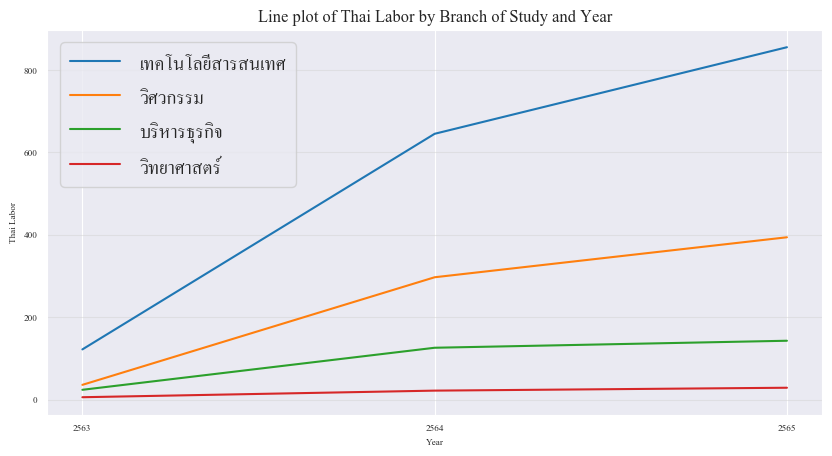

In [34]:
plt.rcParams["font.sans-serif"] = ["Angsana New"]

plt.figure(figsize=(10, 5))
plt.title('Line plot of Thai Labor by Branch of Study and Year', fontname='Angsana New', fontsize = 18)

sns.set_style("darkgrid")
sns.lineplot(x ='Year', y ='แรงงานไทย', hue = 'สาขาวิชา', data = clean_all_year_data)
plt.legend(prop={'family':'Angsana New', 'size': 18})
plt.xticks(clean_all_year_data['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Thai Labor')

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()

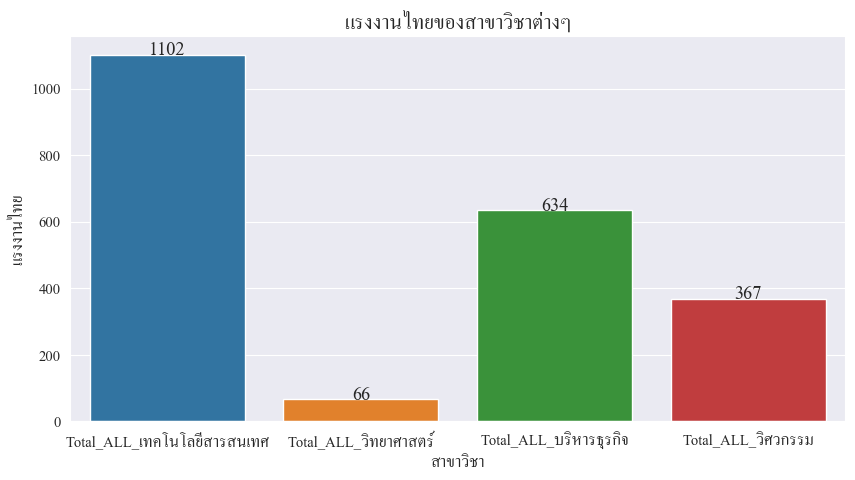

In [35]:
prop = fm.FontProperties(fname='C:/Users/USER/AppData/Local/Microsoft/Windows/Fonts/angsau.ttf')
plt.rcParams['font.family'] = prop.get_name()

plt.figure(figsize=(10, 5))
sns.barplot(x='สาขาวิชา', y='แรงงานไทย', data=all_majors_job)
for index, value in enumerate(all_majors_job['แรงงานไทย']):
    plt.text(index, value, str(value), fontsize=20, ha='center')

plt.title("แรงงานไทยของสาขาวิชาต่างๆ", fontsize=20)
plt.xlabel("สาขาวิชา", fontsize=16)
plt.ylabel("แรงงานไทย", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(visible=True, axis='y')

plt.show()

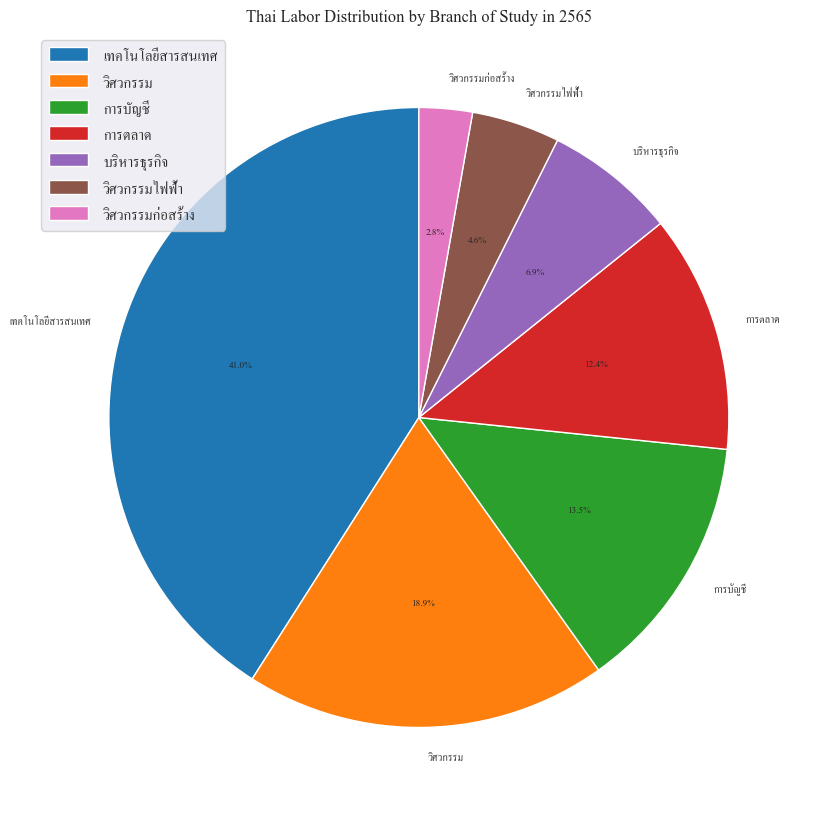

In [51]:
year = 2565
data = data_2565[data_2565['Year'] == year]
data = data.sort_values(by='แรงงานไทย', ascending=False)
data = data.head(7)
labels = data['สาขาวิชา']
sizes = data['แรงงานไทย']
plt.figure(figsize=(10, 30))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Thai Labor Distribution by Branch of Study in {year}', fontsize = 18)
plt.legend(prop={'size': 14})
plt.show()
